
<font size="6"> Part V Assignment 1: Gompertz growth function</font>

The growth of bacteria is also commonly modeled by a Gompertz growth function 
$$ N = N_0 + C exp( -exp( -k(t-Ti) ) ) $$

where $N_0$ is the initial population number, $C$ is the carrying capacity, $k$ is the inital growth rate and $Ti$ determines the point in time where half of the maximum is reached (actually the point of inflection). This function assumes a different type of growth to the logistic growth model and is oftern used as it can model the initial growth phase (or lag phase) better than the logistic function. (A good explanation of different Gompertz models can be found [here](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0178691).)

1) Write a Python function to model the population using a Gompertz function and make a plot of the population over 10 hours (600 mins). Assume $N0=1$ and parameters $k=0.03 min^{-1}$, $C=20000$ and explore the effect of $Ti$ (initiallly choose $Ti = 300$).

2) Now over plot the logistic function from Lesson 1 with the same parameters $k=0.03 min^{-1}$ and $C=20000$. Comment on how these growth curves compare. 



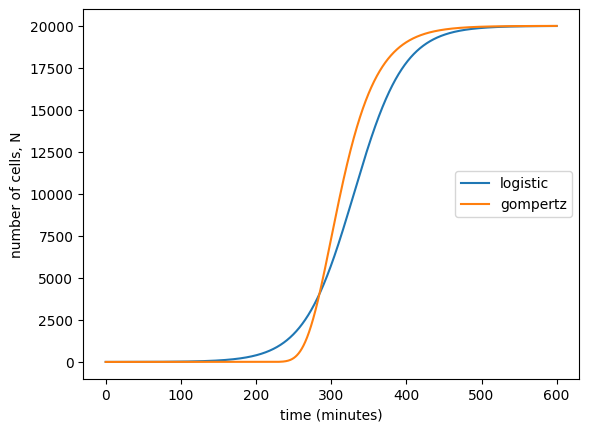

In [2]:
## SOLUTION
from numpy import *
import matplotlib.pyplot as plt

def funcL(t, p):
    N0 = p[0]
    k = p[1]
    C  = p[2]
    N = C*N0*exp(k*t)/(C - N0 + N0*exp(k*t))
    return N

def funcG(t, p):
    N0 = p[0]
    k = p[1]
    C = p[2]
    Ti  = p[3]
    N = N0 + C*exp( -exp( -k*(t-Ti)) )
    return N
    
# define the time range that we want to integrate
times = arange(0,600,0.1)
ntimes = len(times)

pL = [1, 0.03, 20000]
pG = [1, 0.03, 20000, 300]

yL = zeros([ntimes])
yG = zeros([ntimes])

for i in range(ntimes):
    yL[i] = funcL(times[i], pL)
    yG[i] = funcG(times[i], pG)

# make a plot
plt.plot( times, yL, label='logistic' )
plt.plot( times, yG, label='gompertz' )
plt.xlabel('time (minutes)')
plt.ylabel('number of cells, N')
plt.legend(loc=7)
plt.show()